# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

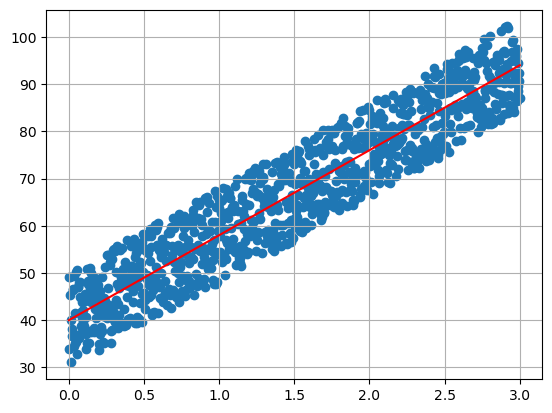

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


m = 1000
x = np.linspace(0, 3, m)
y = 40 + 18*x  
y_noice = y + (20*np.random.rand(m) -10)

plt.figure()
plt.scatter(x, y_noice)
plt.plot(x, y, "r")
plt.grid()

In [36]:
import scipy.optimize as opt

In [31]:
def funcion_de_costo(beta, X, y) :
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @error)[0][0]

modelo:
    
$$\hat{y} = \beta_0 + \beta_1 x $$

In [32]:
beta_inicial = np.random.rand(2)
beta_inicial = np.reshape(beta_inicial, [2, 1])

m = len(y)

y_vector = np.reshape(y_noise, [m, 1])


ones =  np.ones([m, 1])
x_vector = np.reshape(x, [m, 1])


X=np.hstack((ones, x_vector))
X @ beta_inicial

array([[0.88387407],
       [0.88600232],
       [0.88813056],
       [0.89025881],
       [0.89238706],
       [0.8945153 ],
       [0.89664355],
       [0.89877179],
       [0.90090004],
       [0.90302828],
       [0.90515653],
       [0.90728477],
       [0.90941302],
       [0.91154127],
       [0.91366951],
       [0.91579776],
       [0.917926  ],
       [0.92005425],
       [0.92218249],
       [0.92431074],
       [0.92643898],
       [0.92856723],
       [0.93069547],
       [0.93282372],
       [0.93495197],
       [0.93708021],
       [0.93920846],
       [0.9413367 ],
       [0.94346495],
       [0.94559319],
       [0.94772144],
       [0.94984968],
       [0.95197793],
       [0.95410618],
       [0.95623442],
       [0.95836267],
       [0.96049091],
       [0.96261916],
       [0.9647474 ],
       [0.96687565],
       [0.96900389],
       [0.97113214],
       [0.97326038],
       [0.97538863],
       [0.97751688],
       [0.97964512],
       [0.98177337],
       [0.983

In [33]:
funcion_de_costo(beta_inicial, X, y_vector)

4471370.925920758

In [37]:
opt.minimize(funcion_de_costo,
             beta_inicial,
             args = (X, y_vector))

C:\Users\danie\AppData\Local\Temp\ipykernel_31196\3842726949.py:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  opt.minimize(funcion_de_costo,


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 268696.3531524274
        x: [ 6.692e+01  7.087e-01]
      nit: 3
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 5.000e-04  0.000e+00]
            [ 0.000e+00  1.000e+00]]
     nfev: 18
     njev: 6

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

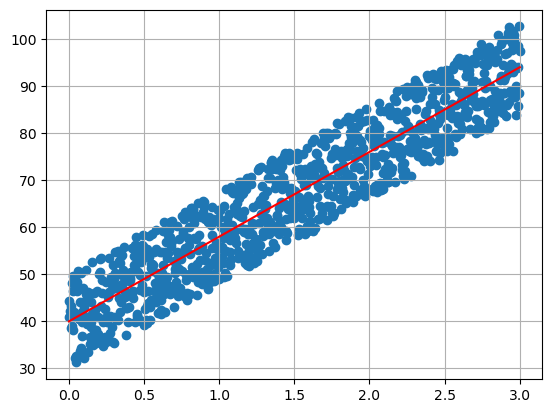

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
m = 1000
x = np.linspace(0, 3, m)
y = 40 + 18*x  
y_noise = y + (20*np.random.rand(m) -10)

plt.figure()
plt.scatter(x, y_noice)
plt.plot(x, y, "r")
plt.grid()

In [49]:
# Plantear modelo
# y = b0 +b1*x

# Factores
# -1
# -x

np.random.seed(0)
beta = np.random.rand(2)
beta = np.reshape(beta, [2, 1])

m = len(y_noise)
ones = np.ones([m, 1])
x_factor = np.reshape (x, [m, 1]) 

X = np.hstack((ones, x_factor))

y_vector = np.reshape(y_noise, [m, 1])


In [53]:
def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta = np.reshape (beta,[n,1])
    y_pred = X @ beta
    error = y_pred - y
    return(error.T @ error)[0][0]


In [54]:
X.shape

(1000, 2)

In [56]:
funcion_de_costo(beta, X, y_vector)

4522432.718641136

In [57]:
import scipy.optimize as opt
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

C:\Users\danie\AppData\Local\Temp\ipykernel_36756\3506251078.py:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  opt.minimize(funcion_de_costo, beta, args=(X, y_vector))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 33778.84404548246
        x: [ 3.989e+01  1.802e+01]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.997e-03 -9.980e-04]
            [-9.980e-04  6.653e-04]]
     nfev: 30
     njev: 10

## Usemos una función cuadrática


$$  \hat{y} = \beta_0 + \beta_1 + \beta_2 x^2 $$

In [65]:
np.random.seed(10)
beta = np.random.rand(4)

#1 multiplica a beta_0
ones=np.ones ([m,1])

# x multiplcia a beta_1
x_factor = np.reshape(x, [m,1]) #con numpy dale forma a x segun la m renglones en 1 columna

#x**2
x2_factor =np.reshape(x**2, [m,1])

# e^x
e_x_factor = np.reshape(np.exp(x),[m,1])

#Después de tener los factores los juntamos
X = np.hstack((ones,x_factor, x2_factor, e_x_factor))

y_vector =np.reshape(y_noise, [m, 1])

In [66]:
def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta = np.reshape (beta,[n,1])
    y_pred = X @ beta
    error = y_pred - y
    return(error.T @ error)[0][0]

In [67]:
funcion_de_costo(beta, X, y)

1089223.057419062

In [69]:
opt.minimize(funcion_de_costo,beta, args=(X,y_vector))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 33766.89060232624
        x: [ 4.001e+01  1.769e+01 -3.570e-03  6.140e-02]
      nit: 16
      jac: [ 0.000e+00  4.883e-04  9.766e-04  9.766e-04]
 hess_inv: [[ 2.358e-07 -7.260e-07  4.061e-07 -8.142e-08]
            [-7.260e-07  2.623e-03 -2.130e-03  4.680e-04]
            [ 4.061e-07 -2.130e-03  1.738e-03 -3.822e-04]
            [-8.142e-08  4.680e-04 -3.822e-04  8.648e-05]]
     nfev: 195
     njev: 39

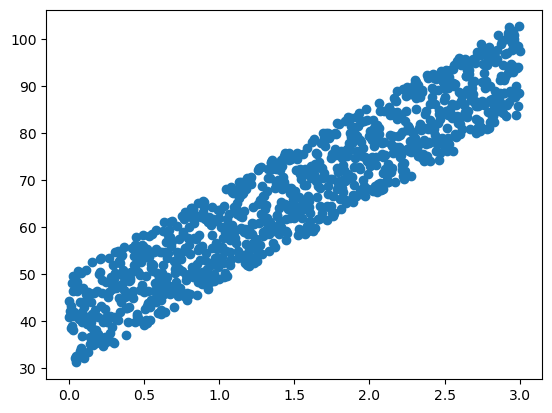

In [81]:
plt.figure()
plt.scatter(x, y_noise)

#lineal = b0 + b1*x
beta=np.random.rand(2)
ones= np.ones([m,1])
x_factor = np.reshape(x, [m,1])
X=np.hstack ((ones, x_factor))
y_vector=np.reshape(y_noise,[m,1])
sol1 =opt.minimize(funcion_de_costo, beta, args = (X, y_vector))

#cuadrática b0 + b1*x + b2*x**2
beta=np.random.rand(3)
x2_factor = np.reshape(x**2, [m,1])
X2=np.hstack ((ones, x_factor, x2_factor))
sol2 =opt.minimize(funcion_de_costo, beta, args = (X2, y_vector))

#cúbica  b0 + b1*x + b2*x**2 +b3_x**3
beta=np.random.rand(4)
x3_factor = np.reshape(x**3, [m,1])
X3=np.hstack ((ones, x_factor, x2_factor,x3_factor))
sol3 =opt.minimize(funcion_de_costo, beta, args = (X3, y_vector))



In [83]:
sol1.x

array([39.89215243, 18.01751886])

In [84]:
sol2.x

array([40.12833   , 17.54469148,  0.15760898])

In [85]:
sol3.x

array([4.01207454e+01, 1.75750980e+01, 1.32260251e-01, 5.63271831e-03])

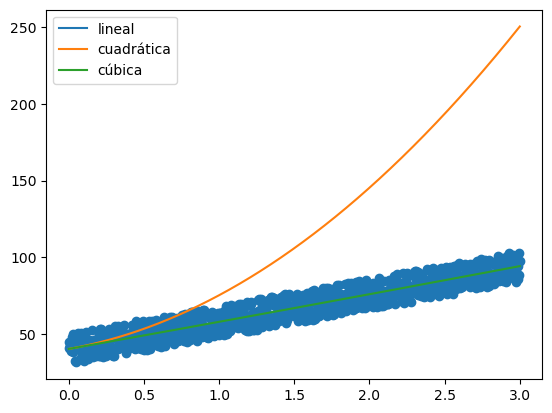

In [86]:
def f1(x):
    return 39.89215243 + 18.01751886*x

def f2(x):
    return 40.12833 + 17.54469148*x + 17.54469148*x**2

def f3(x):
    return 4.01207454e+01 + 1.75750980e+01*x + 1.32260251e-01*x**2 + 5.63271831e-03*x**3


plt.figure()
plt.scatter(x,y_noise)
plt.plot(x, f1(x), label = "lineal")
plt.plot(x, f2(x), label = "cuadrática")
plt.plot(x, f3(x), label = "cúbica")
plt.legend(loc="best")


## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.